## Notes
Just a simple project where I'll show how i work during the process of Data Visualization. I'll explain each code trying to make in the easiest way that i can. I won't use any Machine learning algorithm, just simple algorithms with the purpose of making the visualization of the data easier.

# Importing packages

In [1]:
import pandas as pd # package of dataframes
import numpy as np # package of arrays and other things
import matplotlib.pyplot as plt # package of graphs 
import seaborn as sns # other package of graphs

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading and treating the data

In [2]:
Avocado_df = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv') # reading the data to a dataframe
Avocado_df .head() # Seeing the fisrts 5 rows of the data frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
Avocado_df.info() # Getting some info about the df columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Obs
Normally i would change some columns names to make my job easier, but this names are actually pretty good.

In [4]:
# turning the date column in a actually datetime column to pandas
Avocado_df["Date"] = pd.to_datetime(Avocado_df["Date"])

# Starting the data visualization

I want to see the distribution of the Avarage price. To do this I'm going to use hitograms and kernel density estimate (KDE) plots.

<Axes: xlabel='AveragePrice', ylabel='Density'>

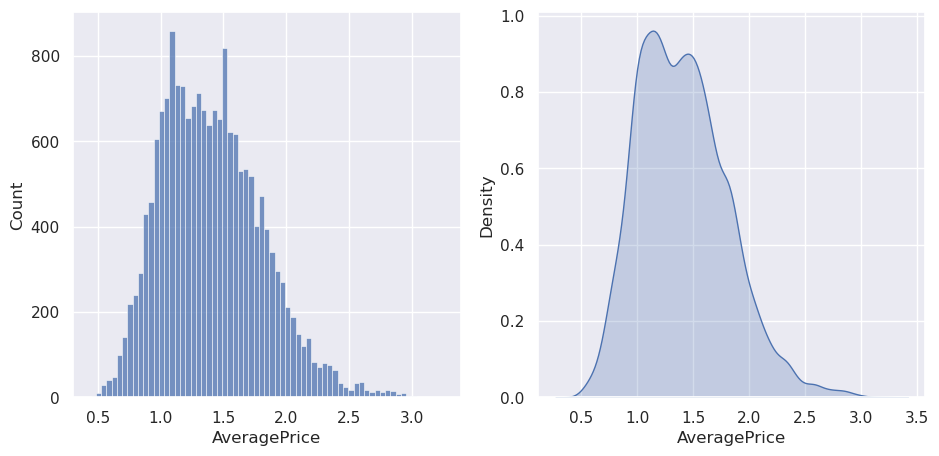

In [5]:
sns.set_theme()

fig,x = plt.subplots(1, 2, figsize=(11,5)) # creating the fig that will contain both graphs side by side
sns.histplot(Avocado_df['AveragePrice'],  ax=x[0]) # Histogram 
sns.kdeplot(Avocado_df['AveragePrice'],  ax=x[1], fill=True) # KDE

#### little note
Now i want to explore a little to see if I find something intersting. I will see the total number of different regions and the diferent types of avocado. 

In [6]:
#Using the functin unique() I can find the differents values that exist in that column, and using the len I count
# the size of that array/list

print('Total number of regions:', len(Avocado_df["region"].unique()))
print('Total number of types:', len(Avocado_df["type"].unique()))
print('Types:', Avocado_df["type"].unique())

Total number of regions: 54
Total number of types: 2
Types: ['conventional' 'organic']


#### little note
Now i'm going to make some graphs to see the proporcion between both types to see if we have the same ammount types

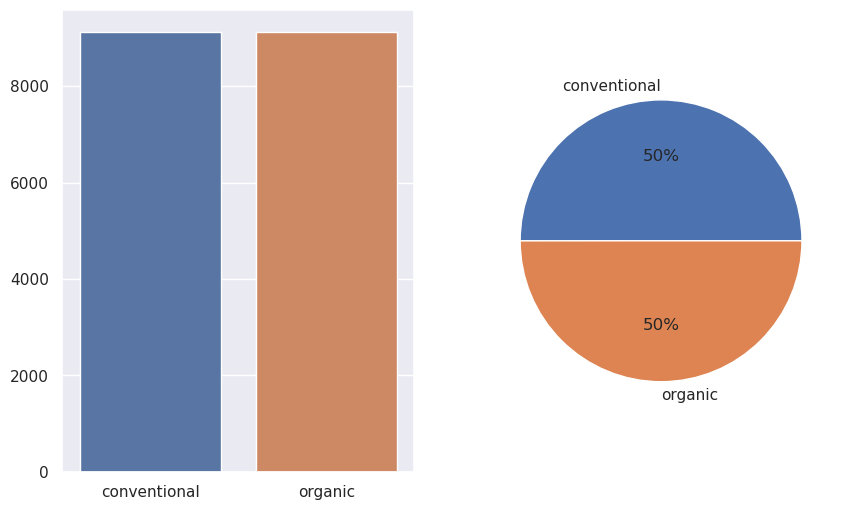

In [7]:
# The funtion value_counts() count the total number of some value that you want (in this case conventional and
# organic) in a array.

x = Avocado_df['type'].unique()
y = [Avocado_df['type'].value_counts()['conventional'], Avocado_df['type'].value_counts()['organic']]


fig, ax = plt.subplots(1, 2, figsize=(10,6)) # creating the fig to display both graphs
sns.barplot(x=x, y=y, ax= ax[0]) # creating a bar plot.
plt.pie(x=y, autopct='%.0f%%', labels=x); # creating a pie plot

#### little note
Now i'll compare the numbers of total Small Bags, Large Bags and XLarge Bags

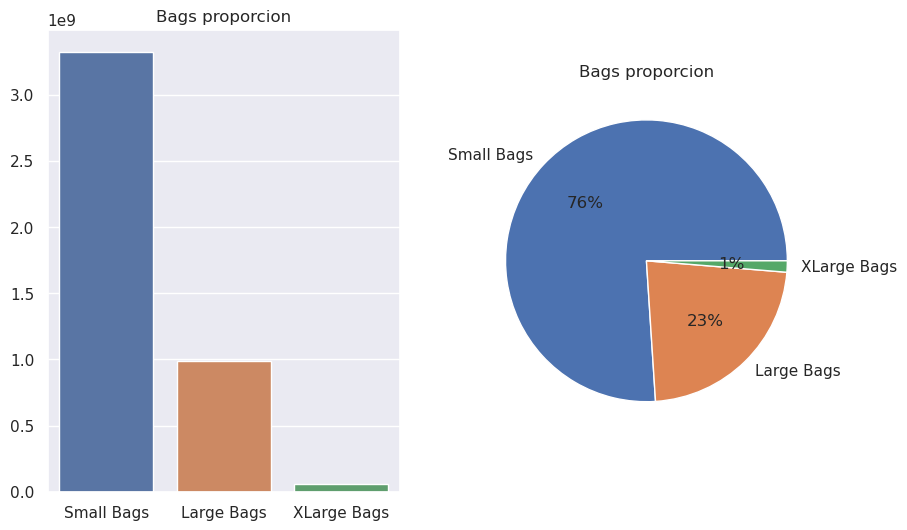

In [8]:
# using the sum() function got the total number of each bag. Then use this values to creat a list(y)
# then i created the x list with the names of each bag

y = [Avocado_df['Small Bags'].sum(), Avocado_df['Large Bags'].sum(), Avocado_df['XLarge Bags'].sum()]
x = ['Small Bags', 'Large Bags', 'XLarge Bags']
fig, ax = plt.subplots(1, 2, figsize=(10,6)) # creating the fig where i'll display both graphs
sns.barplot(x=x, y=y, ax= ax[0]).set(title='Bags proporcion') # creating a barplot and setting a title
plt.pie(x=y, autopct='%.0f%%', labels= x) # creating a pie plot
plt.title('Bags proporcion'); # stting a title to the pie plot
     



#### little note
Here I'll do the same thing but to the 'Hass' type of teh avocado (4046, 4225 e 4770)

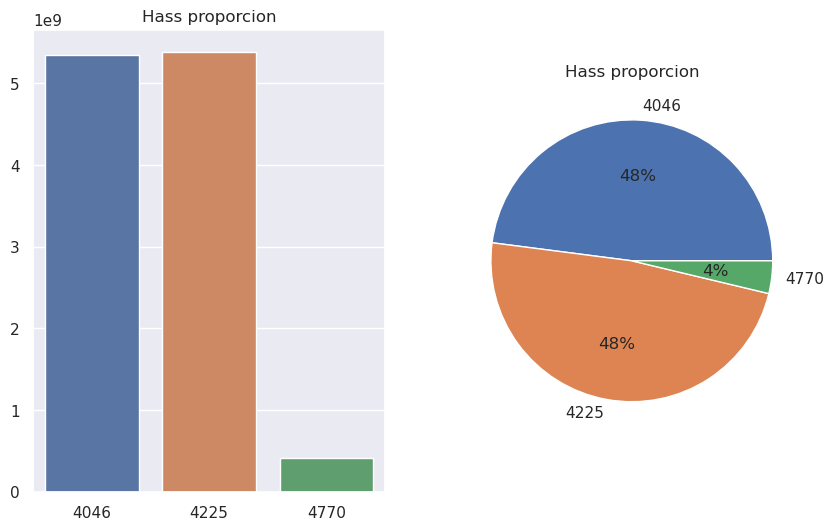

In [9]:
# The code of this cell is the same as the posterior with different columns.

y = [Avocado_df['4046'].sum(), Avocado_df['4225'].sum(), Avocado_df['4770'].sum()]
x = ['4046', '4225', '4770']
fig, ax = plt.subplots(1, 2, figsize=(10,6))
sns.barplot(x=x, y=y, ax= ax[0]).set(title='Hass proporcion')
plt.pie(x=y, autopct='%.0f%%', labels = x)
plt.title('Hass proporcion');

### End of visualizatin
Now we saw all brute simple visualization that help us to understand the data.

# Searching intersting features
In this segment I'll use my ideas to find some patterns and some intersting features as:
### Ideas to explore
* see if there is some comrrelation between the avarege price to the total volume
* find the countrys with the highest and lowest avarage prices
* compare the avarage prices of each semester
* compare the avarage price of each type of avocado